In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import pickle
import time

# Load dữ liệu

In [3]:
data = pd.read_excel("/content/drive/MyDrive/ML/Final_Project/2. data_clean/final_data.xlsx")
data

,Rate,Review,Label,Preprocess_Review
0,9.0,Khu ẩm thực với đa dạng đồ lại còn bày trí đẹp...,1,khu ẩm_thực đa_dạng đồ còn bày trí đẹp nên hấp...
1,9.0,Lúc nào đến aeon là lúc đấy phải tống một đống...,1,aeon phải tống đống mồm đồ ngon rẻ siêu_thị xó...
2,10.0,Bánh ngon lại rẻ chê đâu được gần hết các loại...,1,ngon rẻ chê được trái tiêm foodcourt
3,9.0,Ngon rẻ,1,ngon rẻ
4,"9,6",Tôi sắp chết vì ngập trong sushi mấttttt Lên h...,1,chết ngập sushi hà_nội phải ôm đống đồ court n...
...,...,...,...,...
11125,2.8,"Mình gọi 3 phần như hình, cơm trộn, tobokki, c...",-1,hình trộn tobokki canh kim_chi đen soda đào tổ...
11126,6,Vị trí dễ tìm\nNhân viên bình thường\nĐồ ăn kh...,-1,dễ tìm bình_thường đồ không ngon trộn nhạt_nhẽ...
11127,5,Mình tìm quán này trên Foody thầy cmt nói khá ...,-1,tìm foody thầy cmt khá ổn nên quyết_định tok k...
11128,6.2,Mình với mấy đứa bạn vừa thi xong là phi ra ng...,-1,đứa vừa thi phi ko lầu nên hơi thất_vọng xíu t...


In [4]:
data[data["Preprocess_Review"].isna()]

,Rate,Review,Label,Preprocess_Review


# Xây dựng mô hình phân lớp

In [5]:
# Trích xuất đặc trưng
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Mô hình phân lớp
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Model selection
from sklearn.model_selection import train_test_split

# Đánh giá
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
reviews = data["Preprocess_Review"]
labels = data["Label"]

In [7]:
labels.value_counts()

 1    6706
-1    3267
 0    1157
Name: Label, dtype: int64

## 1. Train, test splitting

In [8]:
train_x, test_x, train_y, test_y = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

In [9]:
train_y.value_counts()

 1    5365
-1    2613
 0     926
Name: Label, dtype: int64

In [10]:
test_y.value_counts()

 1    1341
-1     654
 0     231
Name: Label, dtype: int64

## 2. WordCloud cho từng lớp

In [11]:
from wordcloud import WordCloud

In [12]:
np_train_x = np.array(train_x)
np_train_y = np.array(train_y)

### 2.1. Tích cực

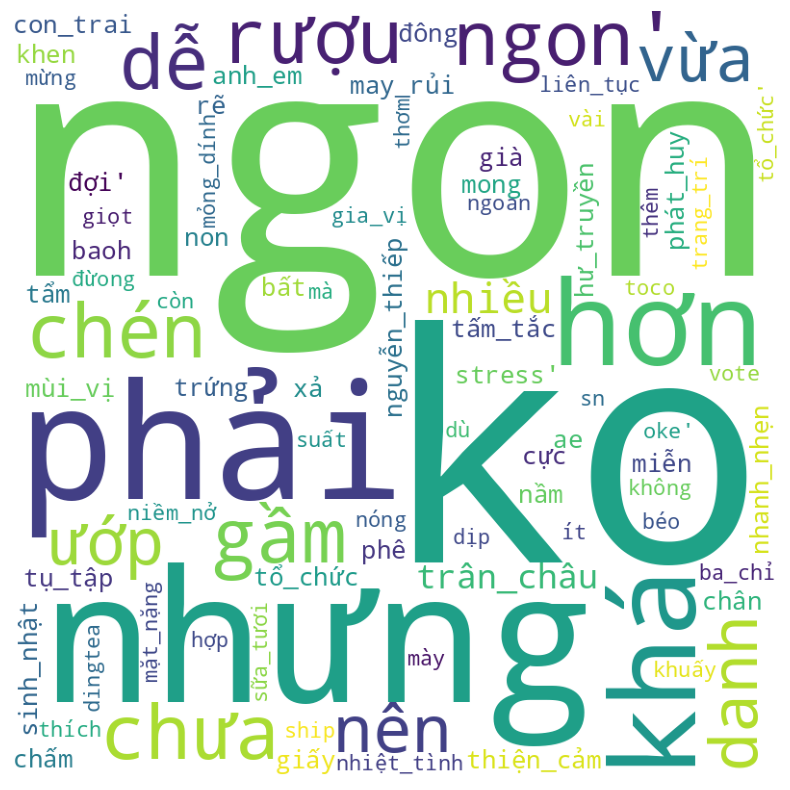

In [13]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.2. Trung lập

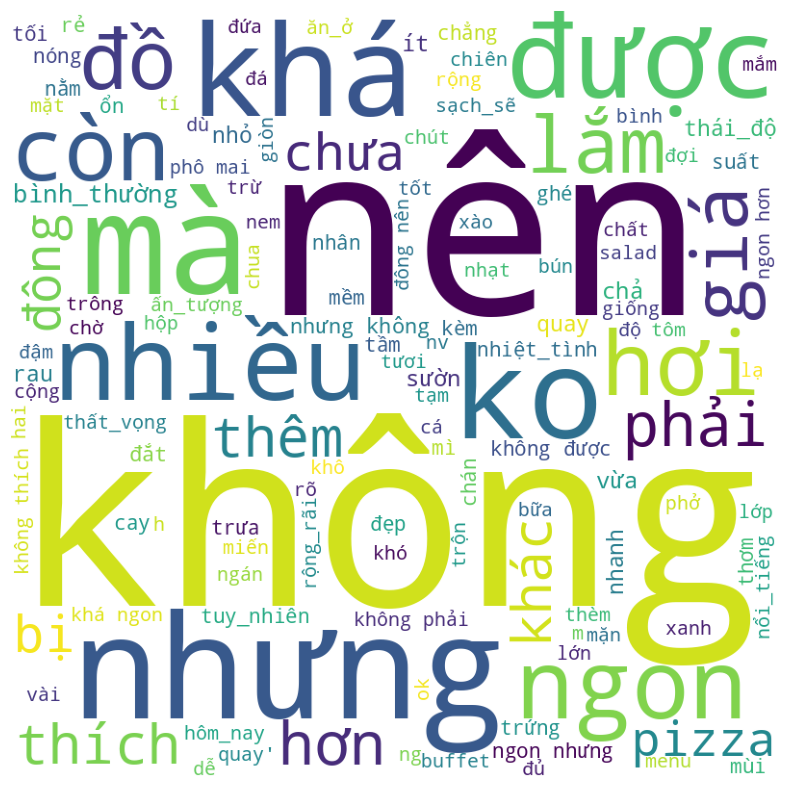

In [14]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 0)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.3. Tiêu cực

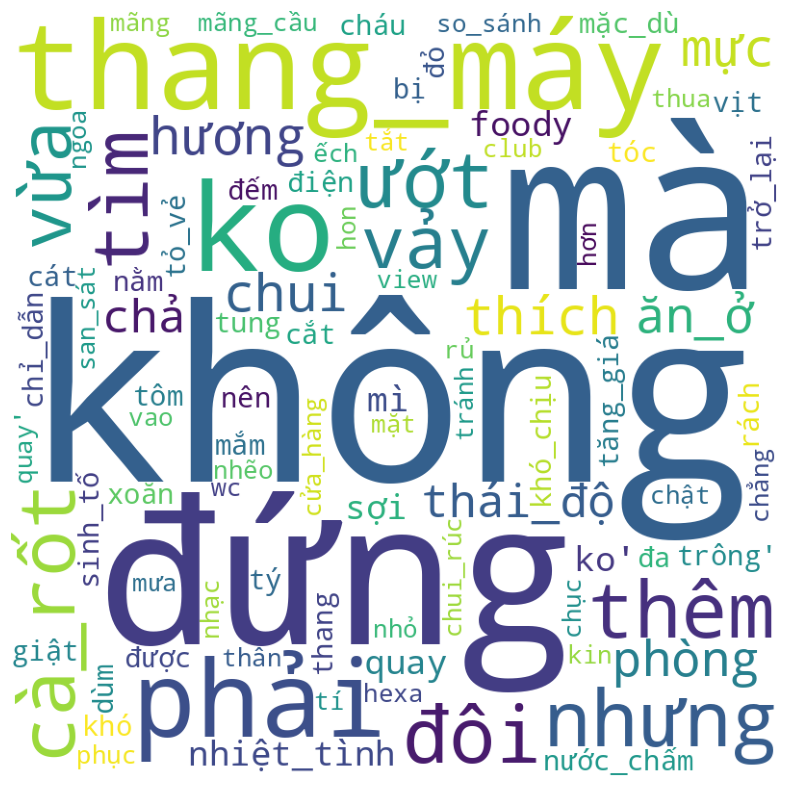

In [15]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == -1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Trích xuất đặc trưng

In [16]:
# Tạo đối tượng TfidfVectorizer
tfidf = TfidfVectorizer()

# Biến đổi tập huấn luyện thành ma trận TF-IDF
train_x_tfidf = tfidf.fit_transform(train_x)

# Biến đổi tập kiểm tra thành ma trận TF-IDF
test_x_tfidf = tfidf.transform(test_x)

## 3. Huấn luyện mô hình Machine Learning

### 3.1. KNN

In [17]:
knn = KNeighborsClassifier()
start = time.time()
knn.fit(train_x_tfidf, train_y)
print('KNN training time: %d' %(time.time() - start))

KNN training time: 0


In [18]:
pred_y = knn.predict(test_x_tfidf)
score = knn.score(test_x_tfidf, test_y)
print('KNN score: ', score)

KNN score:  0.6644204851752021


In [19]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -1       0.66      0.46      0.54       654
           0       0.20      0.23      0.21       231
           1       0.74      0.84      0.79      1341

    accuracy                           0.66      2226
   macro avg       0.54      0.51      0.52      2226
weighted avg       0.66      0.66      0.66      2226



<Axes: >

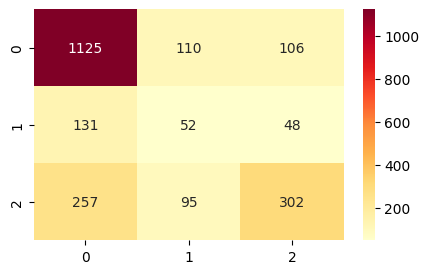

In [20]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 2.1. Multinomial Naive Bayes

In [21]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(train_x_tfidf, train_y)
print('Multinomial Bayes training time: %d' %(time.time() - start))

Multinomial Bayes training time: 0


In [22]:
pred_y = mnb.predict(test_x_tfidf)
score = mnb.score(test_x_tfidf, test_y)
print('Multinomial Naive Bayes score: ', score)

Multinomial Naive Bayes score:  0.7425876010781671


In [23]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -1       0.89      0.49      0.63       654
           0       0.00      0.00      0.00       231
           1       0.71      0.99      0.83      1341

    accuracy                           0.74      2226
   macro avg       0.54      0.49      0.49      2226
weighted avg       0.69      0.74      0.69      2226



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

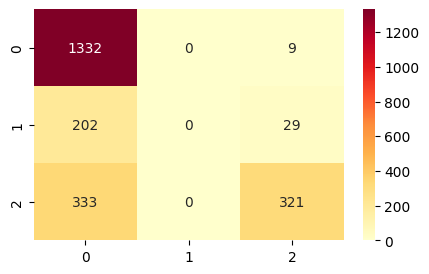

In [24]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 2.2. Logistic Regression

In [25]:
lgres = LogisticRegression()
start = time.time()
lgres.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 1


In [26]:
pred_y = lgres.predict(test_x_tfidf)

score = lgres.score(test_x_tfidf, test_y)
print('Logistic regression score: ', score)

Logistic regression score:  0.816711590296496


In [27]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -1       0.78      0.81      0.80       654
           0       0.52      0.10      0.16       231
           1       0.84      0.94      0.89      1341

    accuracy                           0.82      2226
   macro avg       0.72      0.62      0.62      2226
weighted avg       0.79      0.82      0.79      2226



<Axes: >

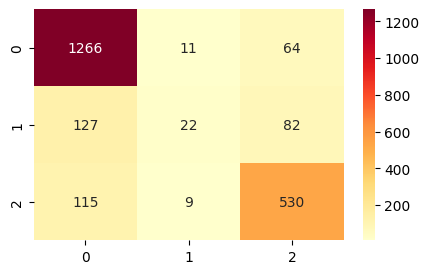

In [28]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 2.3. SVM

In [29]:
svm = SVC(random_state=42)
start = time.time()
svm.fit(train_x_tfidf, train_y)
print('SVM training time: %d' %(time.time() - start))

SVM training time: 19


In [30]:
pred_y = svm.predict(test_x_tfidf)

score = svm.score(test_x_tfidf, test_y)
print('SVM score: ', score)

SVM score:  0.8108715184186882


In [31]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -1       0.79      0.80      0.79       654
           0       0.24      0.02      0.03       231
           1       0.83      0.95      0.89      1341

    accuracy                           0.81      2226
   macro avg       0.62      0.59      0.57      2226
weighted avg       0.75      0.81      0.77      2226



<Axes: >

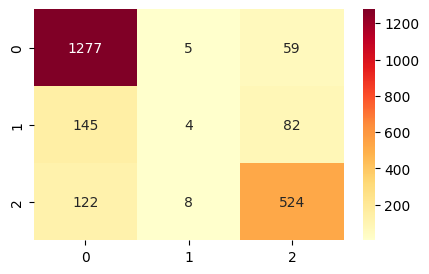

In [32]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

# Tinh chỉnh siêu tham số

## 1. GridSearch

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, cross_val_score

In [34]:
# Define parameter grid
param_grid = {'C': np.arange(0.25,7.5,0.25),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

# Define grid search
grid_search = GridSearchCV(lgres, param_grid, cv=5, n_jobs=-1)

# Train the model with grid search
start = time.time()
grid_search.fit(train_x_tfidf, train_y)
print('Training time:', (time.time() - start))

# Print the best parameters
print('Best parameters:', grid_search.best_params_)

Training time: 240.32128262519836
Best parameters: {'C': 3.25, 'solver': 'liblinear'}


## 2. Best model

In [35]:
best_model = LogisticRegression(C= 3.25, solver='liblinear')
start = time.time()
best_model.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 0


In [36]:
pred_y = best_model.predict(test_x_tfidf)

score = best_model.score(test_x_tfidf, test_y)
print('Logistic regression score: ', score)

Logistic regression score:  0.8122192273135669


In [37]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -1       0.78      0.81      0.79       654
           0       0.44      0.09      0.15       231
           1       0.84      0.94      0.89      1341

    accuracy                           0.81      2226
   macro avg       0.68      0.61      0.61      2226
weighted avg       0.78      0.81      0.78      2226



<Axes: >

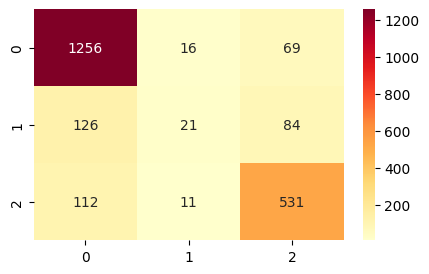

In [38]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

# Thử nghiệm

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import math

## 1. Tiền xử lí

In [40]:
import regex as re

In [41]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 61.5 MB/s eta 0:00:00


### 1. Xóa HTML tag

In [42]:
def remove_html(text):
  return re.sub(r'<[^>]*>', '', text)

print(remove_html("<h1>Title</h1>"))

Title


### 2. Chuẩn hóa dấu câu

In [43]:
from underthesea import text_normalize
def convert_unicode(txt):
  return text_normalize(txt)

print(convert_unicode("Ðảm baỏ chất lựơng phòng thí nghịêm hoá học"))

Đảm bảo chất lượng phòng thí nghiệm hóa học


### 3. Đưa về dạng viết thường

In [44]:
def to_lower_case(sentence):
    sentence = sentence.lower()
    return sentence

print(to_lower_case('Tôi là dân IT!'))

tôi là dân it!


### 4. Xóa các ký tự không cần thiết

In [45]:
def remove_unnecessary_charactor(document):
    # xóa các ký tự đặc biệt, emoji
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa kí tự chứa số
    document = re.sub(r'\w*\d\w*', '', document).strip()
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

document = 'Biết 1505 là gì không? 😆'
remove_unnecessary_charactor(document)

'Biết là gì không'

### 5. Tách từ tiếng Việt

In [46]:
from underthesea import word_tokenize

sentence = 'Xin chào, rất vui được làm quen, tôi đến từ đất nước Việt Nam!'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Xin', 'chào', ',', 'rất', 'vui', 'được', 'làm quen', ',', 'tôi', 'đến', 'từ', 'đất nước', 'Việt Nam', '!']
Xin chào , rất vui được làm_quen , tôi đến từ đất_nước Việt_Nam !


### 6. Chuẩn hóa những từ lặp âm tiết

In [47]:
def remove_duplicate_characters(text):
    pattern = re.compile(r'(\w)\1{2,}')
    text = pattern.sub(r'\1', text)
    return text

print(remove_duplicate_characters("Trà sữa ngon nhân viên bán hàng nhiệt tình! Likeeeeeee!"))

Trà sữa ngon nhân viên bán hàng nhiệt tình! Like!


### 9. Loại bỏ stopword

Stopword là những từ thường xuyên xuất hiện trong văn nói, văn viết và không có quá nhiều ý nghĩa, đặc trưng cho bài toán phân loại cảm xúc trong câu. Ví dụ về stopword như: là, rằng, theo, thì, đó,...

In [48]:
%cd /content
!git clone https://github.com/npk7264/vietnamese-stopwords.git

/content
Cloning into 'vietnamese-stopwords'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 135 (delta 21), reused 7 (delta 2), pack-reused 81
Receiving objects: 100% (135/135), 61.30 KiB | 8.76 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [49]:
stopwords = open('/content/vietnamese-stopwords/food-sentiment-custom/stopword.txt')
stopwords = stopwords.readlines()
stopwords = [x.strip() for x in stopwords]

**Note**: Bộ dữ liệu stopword từ github đã được custom cho phù hợp với bài toán

In [50]:
len(stopwords)

1918

In [51]:
def remove_stopwords(document):
  words = document.split(' ')
  res = list()
  for word in words:
    if word not in stopwords:
      res.append(word)

  return ' '.join(res)

### 10. Tổng hợp

In [52]:
def text_preprocessing(document):
  document = remove_html(document)
  document = convert_unicode(document)
  document = to_lower_case(document)
  document = remove_unnecessary_charactor(document)
  document = word_tokenize(document, format='text')
  document = remove_duplicate_characters(document)
  document = re.sub(r'\s+', ' ', document).strip() # xóa khoảng trắng thừa
  document = re.sub(r'\s+', ' ', document).strip() # xóa khoảng trắng thừa
  document = remove_stopwords(document)
  return document

text_preprocessing('Không cần theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.')

'không nghị_định ban_hành dân'

## 2. Dự đoán 1 bình luận

In [53]:
def predict_sentiment():
  review = text_preprocessing(input("Nhập bình luận: "))
  print(review)
  review_tfidf = tfidf.transform([review])
  sentiment = best_model.predict(review_tfidf)[0]
  if sentiment == 1:
    print("Cảm xúc của bình luận này mang tính: tích cực")
  elif sentiment == 0:
      print("Cảm xúc của bình luận này mang tính: trung lập")
  else:
      print("Cảm xúc của bình luận này mang tính: tiêu cực")

In [54]:
predict_sentiment()

Nhập bình luận: ko ngon
ko ngon
Cảm xúc của bình luận này mang tính: tích cực


In [55]:
predict_sentiment()

Nhập bình luận: ko ngon cho lắm 
ko ngon
Cảm xúc của bình luận này mang tính: tích cực


In [56]:
predict_sentiment()

Nhập bình luận: dở
dở
Cảm xúc của bình luận này mang tính: tiêu cực


In [57]:
predict_sentiment()

Nhập bình luận: quán bẩn, nhân viên không nhiệt tình 
bẩn không nhiệt_tình
Cảm xúc của bình luận này mang tính: tiêu cực


In [58]:
predict_sentiment()

Nhập bình luận: sẽ không quay lại
không
Cảm xúc của bình luận này mang tính: tiêu cực


In [59]:
predict_sentiment()

Nhập bình luận: ủng hộ lần sau 
ủng_hộ
Cảm xúc của bình luận này mang tính: tích cực


In [62]:
predict_sentiment()

Nhập bình luận: cái cốc 

Cảm xúc của bình luận này mang tính: tích cực
